In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/ryand/pyprojects/Data/Crimes_-_2001_to_present.csv')
stations = pd.read_csv('/Users/ryand/pyprojects/Chicago Transit Crime/CTARailStations.csv')

__TO DO__
* Make density hex-grid
* 

In [6]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'sort'],
      dtype='object')

In [29]:
df['sort'] = np.random.rand(len(df['Latitude']))
df = df[df['Latitude'] > 40]
sample = df.sort_values('sort')[::400]

In [30]:
sample.groupby('Primary Type').count()[['ID']]

,ID
Primary Type,
ARSON,22
ASSAULT,989
BATTERY,2867
BURGLARY,936
CRIM SEXUAL ASSAULT,45
CRIMINAL DAMAGE,1853
CRIMINAL TRESPASS,428
DECEPTIVE PRACTICE,512
GAMBLING,37


In [31]:
sample = sample[sample['Latitude'] > 40]

In [37]:
second = sample[sample['Primary Type'] == 'THEFT']
first = sample[sample['Primary Type'] == 'NARCOTICS']

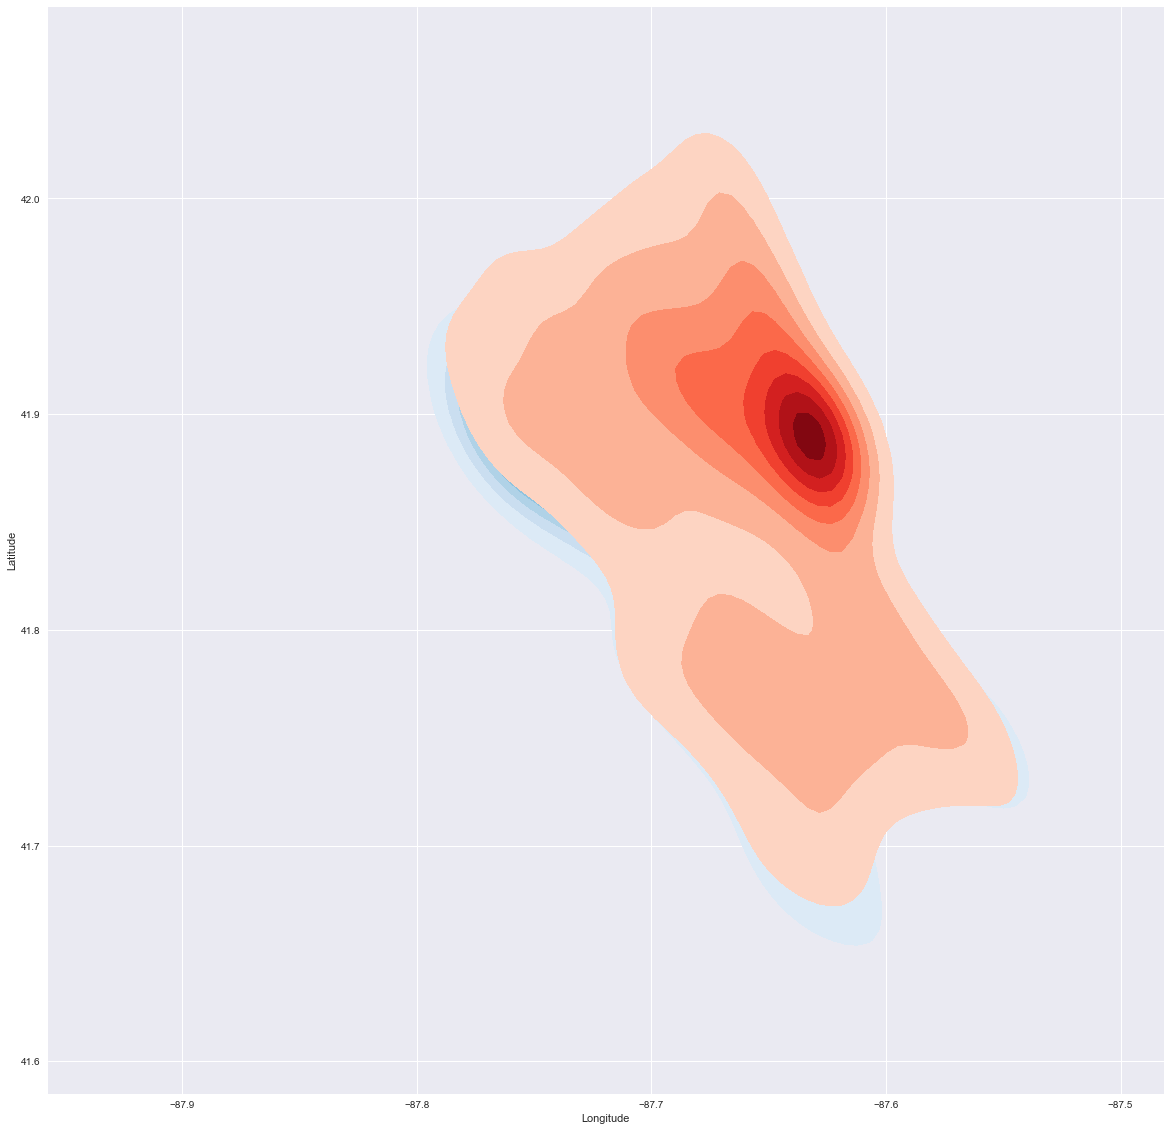

In [38]:
fig = plt.figure(figsize=(20,20))
sns.kdeplot(first['Longitude'], first['Latitude'], shade=True, cmap="Blues", n_levels=10, shade_lowest=False)
sns.kdeplot(second['Longitude'], second['Latitude'], shade=True, cmap="Reds", n_levels=10, shade_lowest=False)

In [62]:
perc_samp = 1

narrow =[
    'ASSAULT',
    'BATTERY',
    'CRIMINAL DAMAGE',
    'HOMICIDE',
    'NARCOTICS',
    'PROSTITUTION',
    'THEFT',
    'WEAPONS VIOLATION',
    'CRIMINAL TRESPASS'
]
df_n = df[(df['Primary Type'].isin(narrow)) 
#           & (df['Year'].isin([2012,2013,2014,2015,2016]))
         ]
df_n = df_n[::int(len(df_n)/(len(df_n)*perc_samp))]

(-87.775, -87.575)

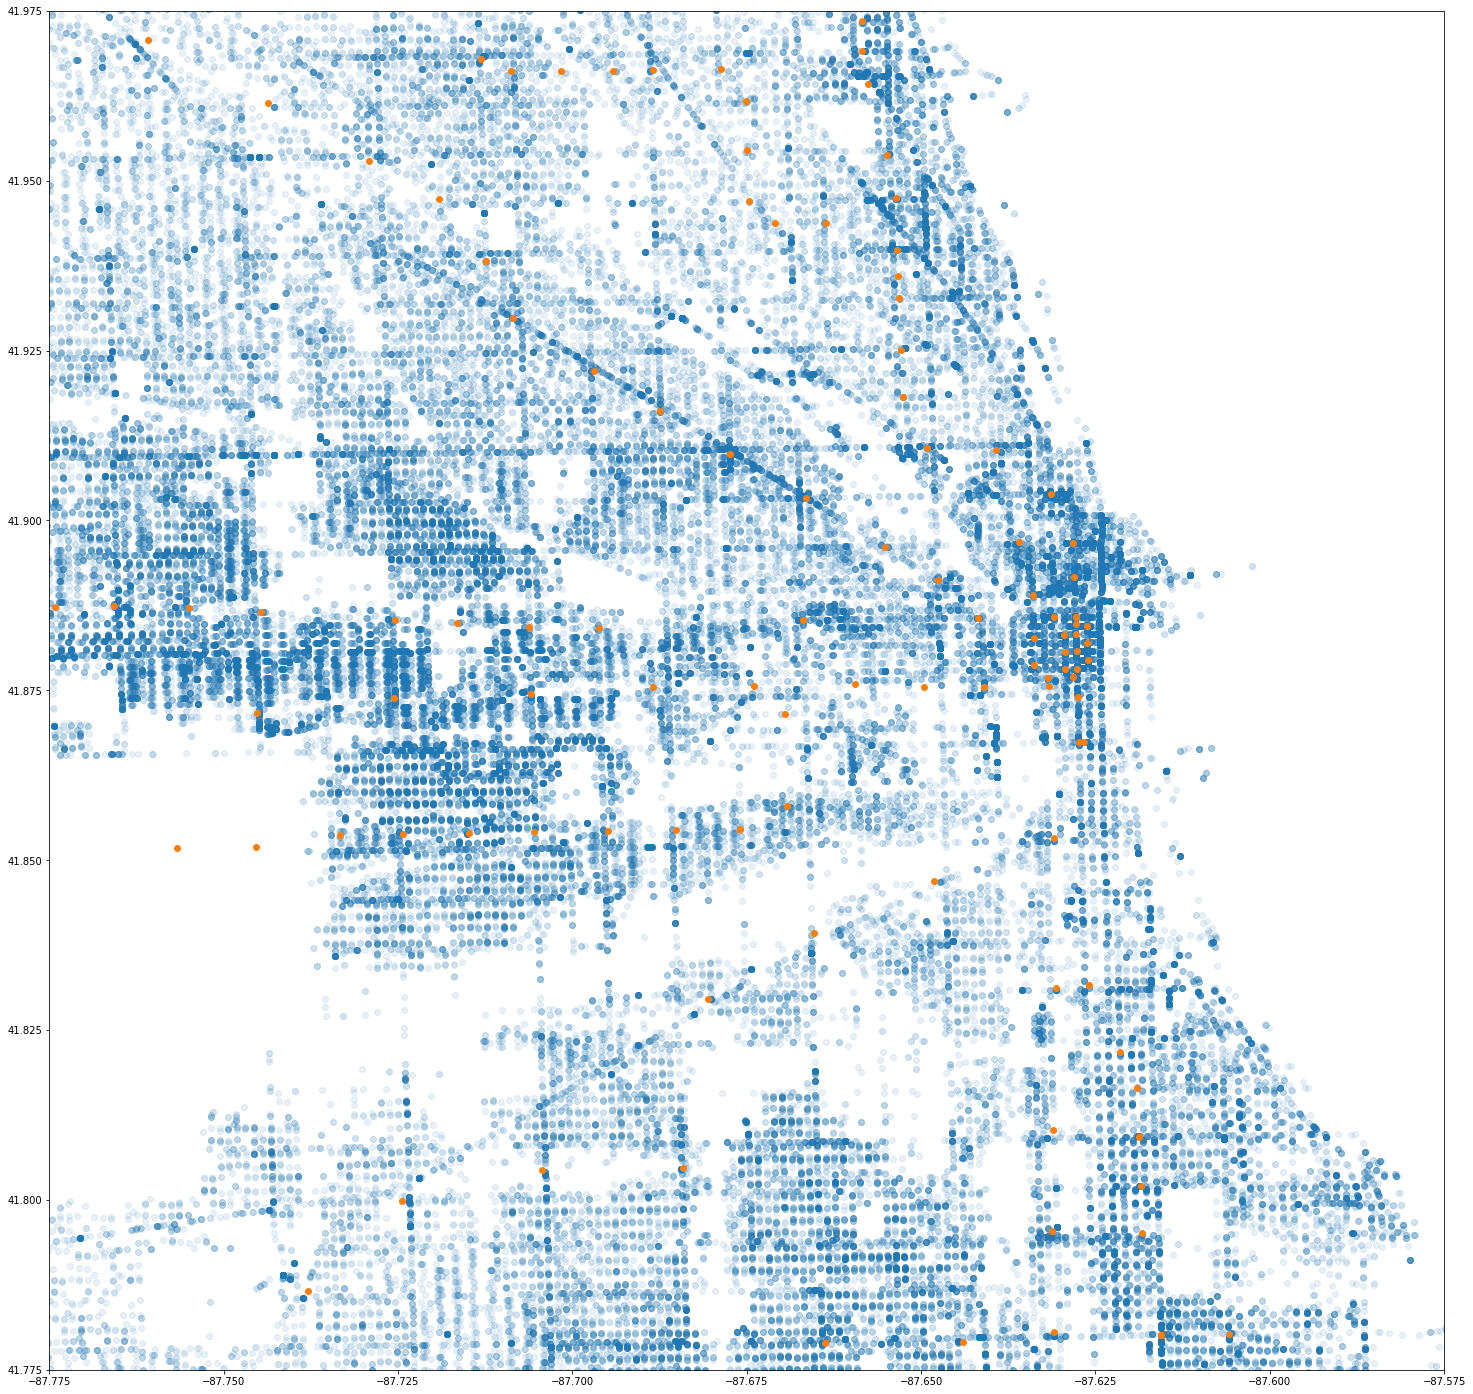

In [61]:
plt.figure(figsize=(25,25))
plt.scatter(df_n['Longitude'], df_n['Latitude'], alpha=.1)
plt.scatter(stations['Longitude'], stations['Latitude'])
y_start = 41.775
x_start = -87.775
geo_size = .20
plt.ylim(y_start,(y_start+geo_size))
plt.xlim(x_start,(x_start+geo_size))

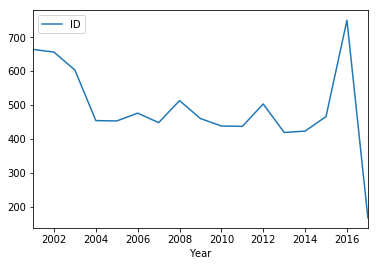

In [15]:
df[df['Primary Type'] == 'HOMICIDE'].groupby('Year').count()[['ID']].plot()

In [16]:
t_crime = df.groupby('Year').count()[['ID']]

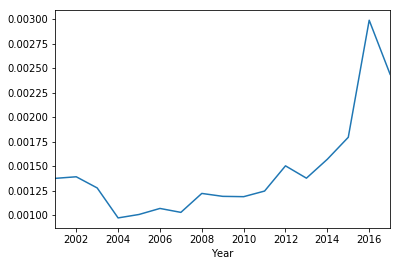

In [19]:
thinking = df[df['Primary Type'] == 'HOMICIDE'].groupby('Year').count()[['ID']]
thinking = thinking.join(t_crime,lsuffix='_unique', rsuffix='_total')
thinking['per'] = thinking['ID_unique']/thinking['ID_total']
thinking['per'].plot()#CRIMINAL TRESPASS